In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
210192,플레임 (ooo0273),플레임 생방송 :3,시청자 207명,Just Chatting,2022-10-12 12:35:04.729163
210193,세계__ (world1104),미시룩 / 점프킹 같은 게임,시청자 206명,Just Chatting,2022-10-12 12:35:04.729163
210194,스테로이드_ (stero2d),신작 | 토치라이트 인피니트 | 신캐릭으로 달림 : 티아,시청자 204명,Torchlight: Infinite,2022-10-12 12:35:04.729163
210195,반애용 (dodyd1120),방송 켜자마자 미안하지만.............,시청자 198명,Just Chatting,2022-10-12 12:35:04.729163
210196,행수 (matarzzz),15시간씩 자는사람,시청자 195명,League of Legends,2022-10-12 12:35:04.729163


In [3]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [4]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [5]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
205207,랄로 (aba4647),늙고 병든 나서스,1.1만,League of Legends,2022-10-12 04:15:04.635455
205257,랄로 (aba4647),늙고 병든 나서스,1.1만,League of Legends,2022-10-12 04:20:05.195092
205307,랄로 (aba4647),늙고 병든 나서스,1.1만,League of Legends,2022-10-12 04:25:04.861002
205357,랄로 (aba4647),늙고 병든 나서스,1만,League of Legends,2022-10-12 04:30:04.802317


In [6]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
205207    11500.0
205257    11500.0
205307    11500.0
205357    10500.0
205407    10500.0
Name: 시청자수, Length: 6751, dtype: float64

In [7]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [8]:
df.loc[df2.index, '시청자수'] = df2

In [9]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [10]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [11]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
210192        207
210193        206
210194        204
210195        198
210196        195
Name: 시청자수, Length: 210175, dtype: object

In [12]:
df['시청자수'] = df['시청자수'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210175 entries, 0 to 210196
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      210175 non-null  object
 1   제목      210175 non-null  object
 2   시청자수    210175 non-null  int32 
 3   카테고리    210175 non-null  object
 4   일시      210175 non-null  object
dtypes: int32(1), object(4)
memory usage: 8.8+ MB


In [14]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [15]:
df1 = df

In [16]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,36051.879877
우왁굳 (woowakgood),16873.855708
한동숙 (handongsuk),15498.244969
풍월량 (hanryang1125),15409.270134
enchantenter,15408.673152
아이네_ (vo_ine),14284.519164
릴파_ (lilpaaaaaa),11452.890110
랄로 (aba4647),11041.443478
침착맨 (zilioner),10804.926061


In [17]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
김도 (kimdoe),아저씨들 널부러진 거 관찰하기,4687,Just Chatting,2022-10-11 23:50:05.027326
김도 (kimdoe),아저씨들 널부러진 거 관찰하기,4601,Just Chatting,2022-10-11 23:55:05.061131
김도 (kimdoe),아저씨들 널부러진 거 관찰하기,4649,Just Chatting,2022-10-12 00:00:04.197042


In [18]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '김도 (kimdoe)', '김도 (kimdoe)', '김도 (kimdoe)', '김도 (kimdoe)',
       '김도 (kimdoe)', '김도 (kimdoe)', '김도 (kimdoe)', '김도 (kimdoe)',
       '김도 (kimdoe)', '김도 (kimdoe)'],
      dtype='object', name='이름', length=12359)

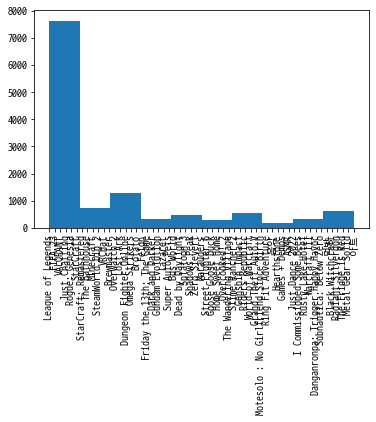

In [19]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [20]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
191154,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:40:05.393820
191204,풍월량 (hanryang1125),오버워치2 풍월량,11500,Overwatch 2,2022-10-11 04:45:05.031340
191254,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:50:05.574218
191304,풍월량 (hanryang1125),오버워치2 풍월량,10500,Overwatch 2,2022-10-11 04:55:05.175608


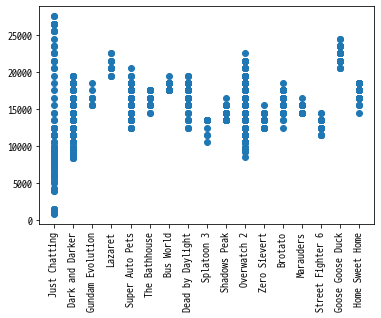

In [21]:
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([250.,  24., 102.,  63.,  89.,  72., 327.,  72.,  76., 117.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

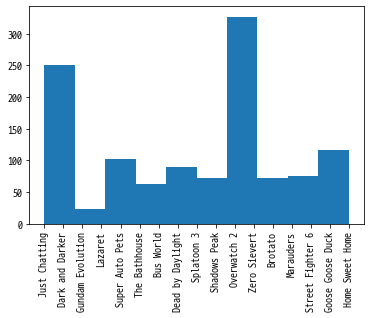

In [22]:
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'])

In [23]:
df_p['카테고리'].value_counts()

Overwatch 2         303
Dark and Darker     139
Just Chatting       111
Super Auto Pets     102
Dead by Daylight     89
Brotato              72
Goose Goose Duck     62
Home Sweet Home      55
Marauders            53
Shadows Peak         43
Bus World            36
Splatoon 3           29
The Bathhouse        27
Zero Sievert         24
Street Fighter 6     23
Lazaret              14
Gundam Evolution     10
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자